In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import linear_model

import tensorflow as tf


In [2]:
# # Allow to print multiple output 
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

In [3]:
from tensorflow.keras import layers, models
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
# with tf.device('/GPU:0'):

Num GPUs Available:  1


## As usual, a small visualization is required

In [4]:
# Importing CLEANED Dataset
df = pd.read_csv('./dataset/immo_collect_clean.csv', index_col = 0)
df.shape
df.head()

(23365, 15)

,postal_code,price,number_of_bedroom,house_area,fully_equipped_kitchen,terrace,is_new,locality,district,province,province_int,region,region_int,district_int,ratio_free_build
5573,4000,85000,1,60,1,0,0,Liège,Liège,liege,4.0,wallonie,1.0,3.0,-2.830605
5574,6032,90000,1,60,1,0,1,Charleroi,Charleroi,hainaut,6.0,wallonie,1.0,21.0,-2.885534
5577,5300,99000,1,45,1,1,1,Andenne,Namur,namur,9.0,wallonie,1.0,1.0,-1.977659
5580,1080,87500,1,42,1,0,1,Molenbeek-Saint-Jean,Bruxelles-Capitale,bruxelles-capitale,3.0,bruxelles-capitale,2.0,30.0,-3.036241
5581,1080,87500,1,42,1,0,1,Sint-Jans-Molenbeek,Bruxelles-Capitale,bruxelles-capitale,3.0,bruxelles-capitale,2.0,30.0,-3.036241


In [5]:
# I retrieve only utils columns for my model

df = df.iloc[:,0:7]
df.head()

,postal_code,price,number_of_bedroom,house_area,fully_equipped_kitchen,terrace,is_new
5573,4000,85000,1,60,1,0,0
5574,6032,90000,1,60,1,0,1
5577,5300,99000,1,45,1,1,1
5580,1080,87500,1,42,1,0,1
5581,1080,87500,1,42,1,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23365 entries, 5573 to 48763
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   postal_code             23365 non-null  int64
 1   price                   23365 non-null  int64
 2   number_of_bedroom       23365 non-null  int64
 3   house_area              23365 non-null  int64
 4   fully_equipped_kitchen  23365 non-null  int64
 5   terrace                 23365 non-null  int64
 6   is_new                  23365 non-null  int64
dtypes: int64(7)
memory usage: 1.4 MB


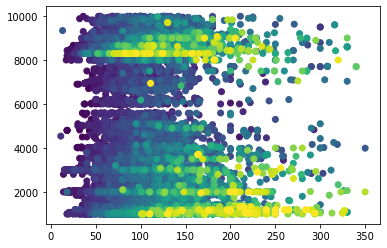

In [7]:
plt.scatter(df['house_area'], df['postal_code'], c=df["price"])

## Preparaing the data 

In [8]:
X = df.drop(columns=['price'])
X.head()

,postal_code,number_of_bedroom,house_area,fully_equipped_kitchen,terrace,is_new
5573,4000,1,60,1,0,0
5574,6032,1,60,1,0,1
5577,5300,1,45,1,1,1
5580,1080,1,42,1,0,1
5581,1080,1,42,1,0,1


In [9]:
y = df[['price']]
y.head()

,price
5573,85000
5574,90000
5577,99000
5580,87500
5581,87500


### Split the dataset

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

## Let's training with deep learning

### Config

In [11]:
INPUT_SIZE = X_train.shape[1]
EPOCHS = 20
LEARNING_RATE = 0.00001
OUTPUT_SIZE = 1
BATCH_SIZE = 32

In [12]:
print("INPUT_SIZE:", INPUT_SIZE)
print("EPOCHS:", EPOCHS)
print("LEARNING_RATE:", LEARNING_RATE)
print("OUTPUT_SIZE:", OUTPUT_SIZE)
print("BATCH_SIZE:", BATCH_SIZE)

INPUT_SIZE: 6
EPOCHS: 20
LEARNING_RATE: 1e-05
OUTPUT_SIZE: 1
BATCH_SIZE: 32


### Model creation

In [13]:
model = models.Sequential()

model.add(layers.Dense(1024, activation='relu', input_shape=(INPUT_SIZE,)))
model.add(layers.Dense(1024, activation='relu'))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
# model.add(layers.Dropout(0.2))

model.add(layers.Dense(OUTPUT_SIZE, activation='linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              7168      
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# Init a standard scaler
ss = StandardScaler()

# Scale the features
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

X_train[0]

array([ 1.13615642, -0.08472071, -0.66865639,  0.64494444, -1.50422689,
        0.73922586])

In [15]:
from tensorflow import keras
opt = keras.optimizers.Adam(learning_rate=LEARNING_RATE)

model.compile(optimizer=opt,
              loss='mae',
              metrics=['mse', 'mae', 'mape'])

In [16]:
with tf.device('/GPU:0'):

    history = model.fit(X_train, y_train, epochs=EPOCHS, 
                        validation_data=(X_test, y_test), batch_size=BATCH_SIZE)

Epoch 1/20
585/585 [==============================] - 6s 8ms/step - loss: 296583.9974 - mse: 111080438186.3754 - mae: 296583.9974 - mape: 99.9811 - val_loss: 294144.2812 - val_mse: 109859069952.0000 - val_mae: 294144.2812 - val_mape: 99.2220
Epoch 2/20
585/585 [==============================] - 4s 6ms/step - loss: 287869.1569 - mse: 106296789823.7816 - mae: 287869.1569 - mape: 95.9068 - val_loss: 207117.4844 - val_mse: 64634437632.0000 - val_mae: 207117.4844 - val_mape: 63.9075
Epoch 3/20
585/585 [==============================] - 4s 6ms/step - loss: 154962.4138 - mse: 43090876870.3345 - mae: 154962.4138 - mape: 47.4924 - val_loss: 87765.7109 - val_mse: 16893674496.0000 - val_mae: 87765.7109 - val_mape: 31.5656
Epoch 4/20
585/585 [==============================] - 4s 6ms/step - loss: 87315.7564 - mse: 16494000774.5529 - mae: 87315.7564 - mape: 31.6758 - val_loss: 82071.7891 - val_mse: 15469110272.0000 - val_mae: 82071.7891 - val_mape: 28.4155
Epoch 5/20
585/585 [=======================

<Figure size 1728x720 with 0 Axes>

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Accuracy')

147/147 [==============================] - 0s 3ms/step - loss: 74790.7812 - mse: 13753111552.0000 - mae: 74790.7812 - mape: 24.8572


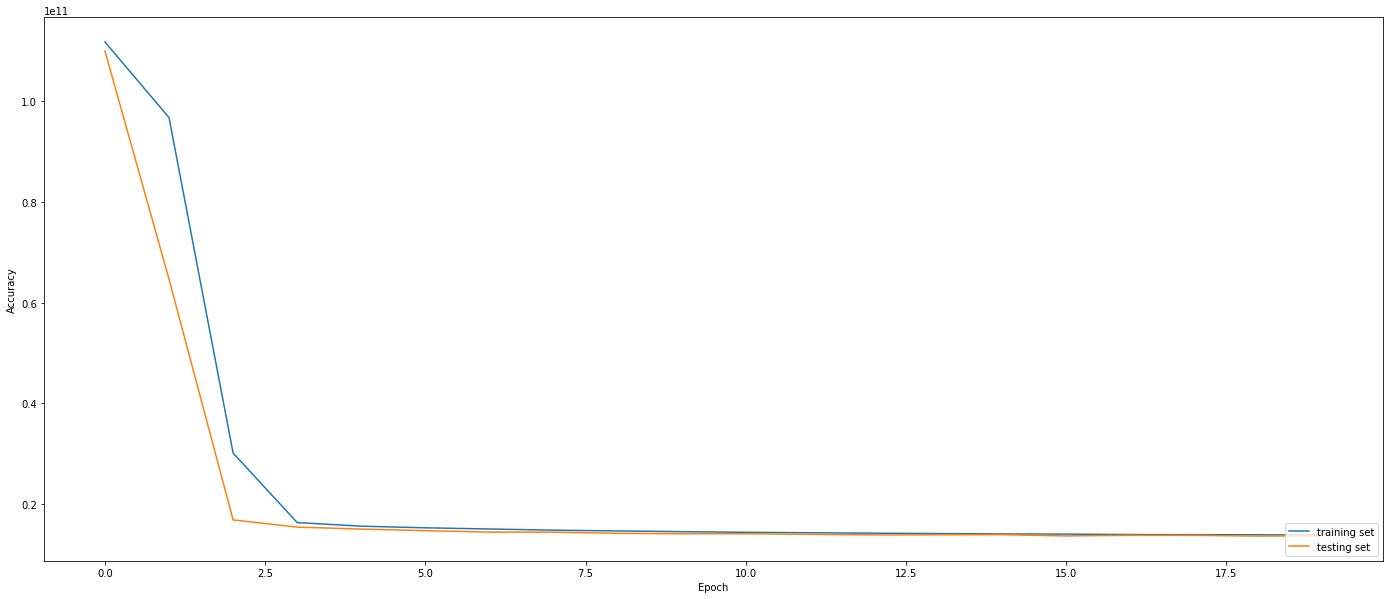

In [17]:
plt.figure(figsize=(24,10))
plt.plot(history.history['mse'], label='training set')
plt.plot(history.history['val_mse'], label = 'testing set')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.1, 1])
plt.legend(loc='lower right')

test_loss, test_mse, test_mae, test_mape = model.evaluate(X_test,  y_test)

<Figure size 1728x720 with 0 Axes>

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Accuracy')

147/147 [==============================] - 0s 3ms/step - loss: 74790.7812 - mse: 13753111552.0000 - mae: 74790.7812 - mape: 24.8572


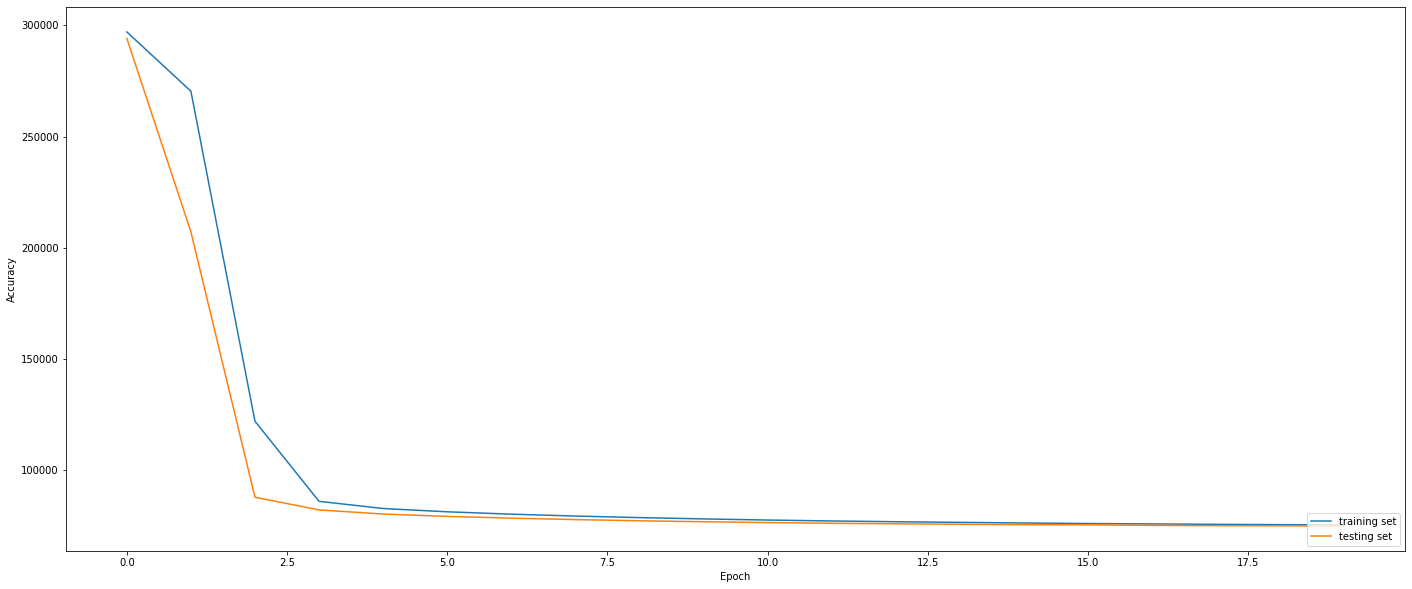

In [18]:
plt.figure(figsize=(24,10))
plt.plot(history.history['mae'], label='training set')
plt.plot(history.history['val_mae'], label = 'testing set')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.1, 1])
plt.legend(loc='lower right')

test_loss, test_mse, test_mae, test_mape = model.evaluate(X_test,  y_test)

<Figure size 1728x720 with 0 Axes>

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Accuracy')

147/147 [==============================] - 0s 3ms/step - loss: 74790.7812 - mse: 13753111552.0000 - mae: 74790.7812 - mape: 24.8572


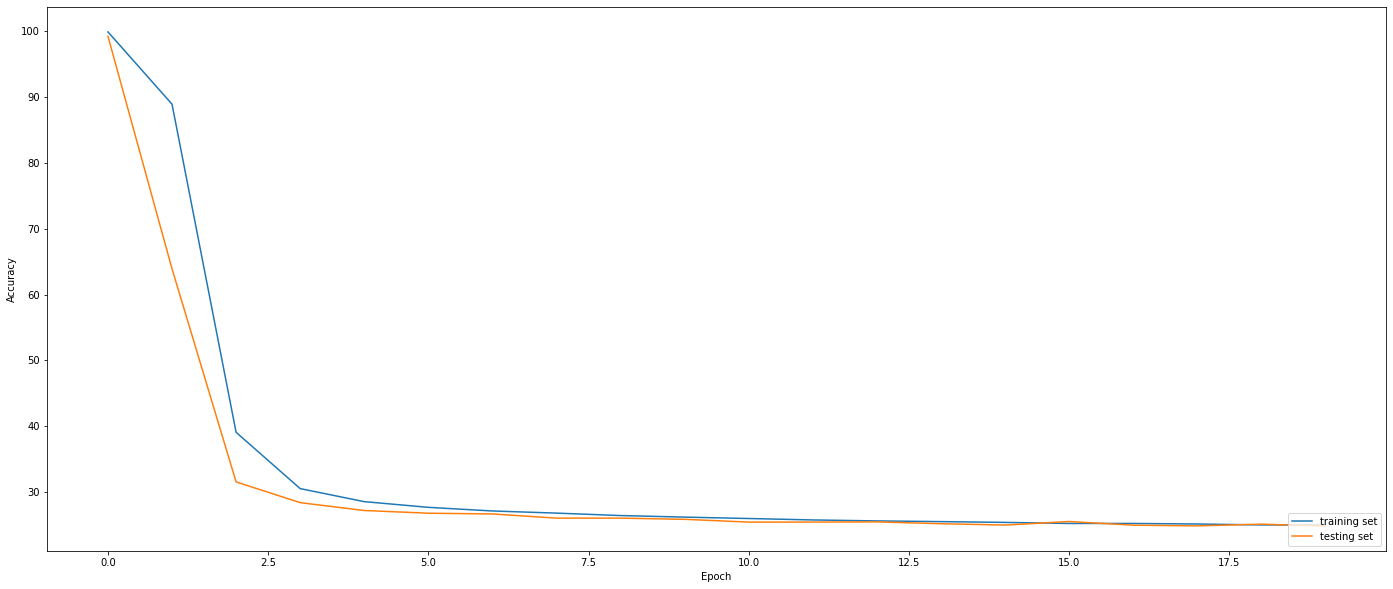

In [19]:
plt.figure(figsize=(24,10))
plt.plot(history.history['mape'], label='training set')
plt.plot(history.history['val_mape'], label = 'testing set')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.1, 1])
plt.legend(loc='lower right')

test_loss, test_mse, test_mae, test_mape = model.evaluate(X_test,  y_test)

In [20]:
y_pred = model.predict(X_test)
y_pred

array([[243733.52],
       [279379.06],
       [261521.55],
       ...,
       [420720.6 ],
       [279817.62],
       [177082.88]], dtype=float32)

In [21]:
model.evaluate(X_test, y_test)

147/147 [==============================] - 0s 3ms/step - loss: 74790.7812 - mse: 13753111552.0000 - mae: 74790.7812 - mape: 24.8572


[74790.78125, 13753111552.0, 74790.78125, 24.857175827026367]

In [22]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.41165166580976653

## Comparaison with machine learning

In [23]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42, n_estimators=1500, learning_rate=0.01,
                            max_depth=6)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1500, n_jobs=12, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [24]:
xgb_model.score(X_train, y_train)
xgb_model.score(X_test, y_test)

0.8124791419787329

0.7709529078491186

# In this case, the deep learning is less efficient but check the next notebook for more (efficient) exemple